In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
gold_ds = '../data_sets/gld_ds.csv'
gold_data = pd.read_csv(gold_ds)

In [18]:
gold_data.shape

(2290, 6)

In [19]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [22]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [23]:
corr = gold_data.corr(numeric_only=True)
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

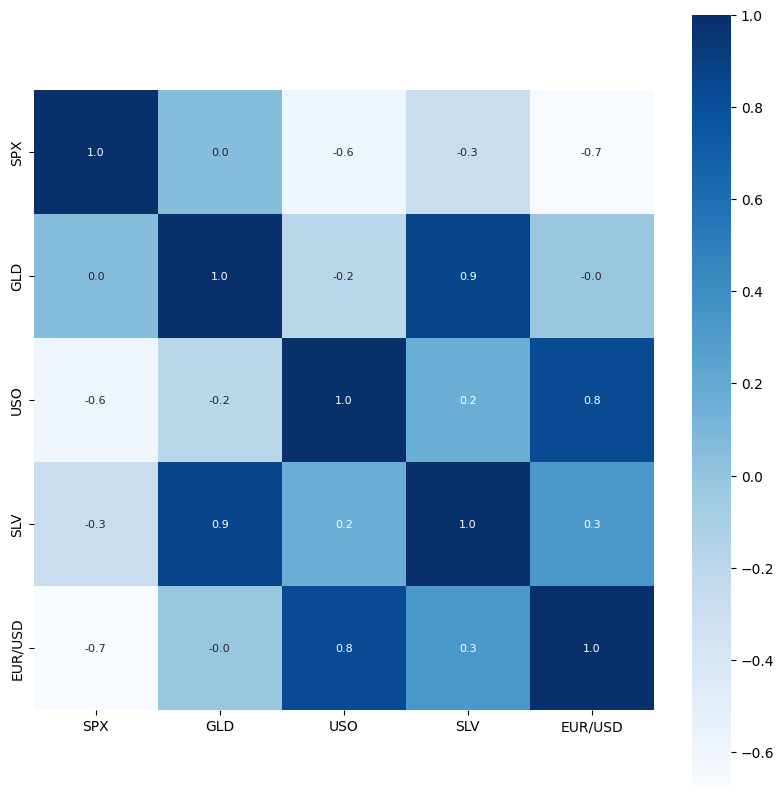

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    cbar=True,
    cmap="Blues",
    square=True,
    annot=True,
    fmt='.1f',
    annot_kws={"size":8}
)

In [34]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

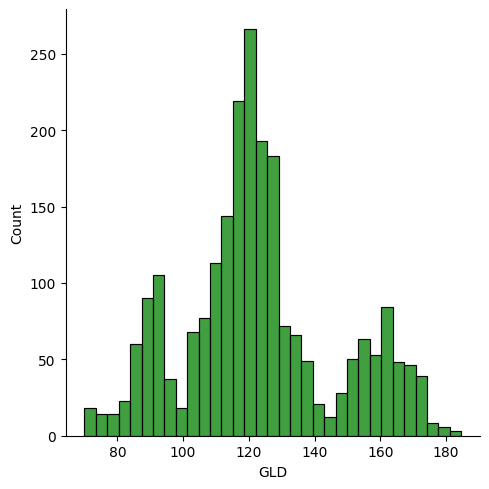

In [35]:
sns.displot(
    gold_data['GLD'],
    color='green'
)

In [36]:
X = gold_data.drop(columns=['GLD', "Date"], axis=1)

Y = gold_data['GLD']

In [38]:
X.shape, Y.shape

((2290, 4), (2290,))

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    train_size=0.8,
    random_state=2,
)

In [42]:
model = RandomForestRegressor()

In [43]:
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
train_data_prediction = model.predict(X_train)

In [45]:
error_score = metrics.r2_score(Y_train, train_data_prediction)

error_score

0.9984765082654102

In [46]:
test_data_prediction = model.predict(X_test)

In [47]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

error_score

0.9889519033451817

In [48]:
Y_test = list(Y_test)

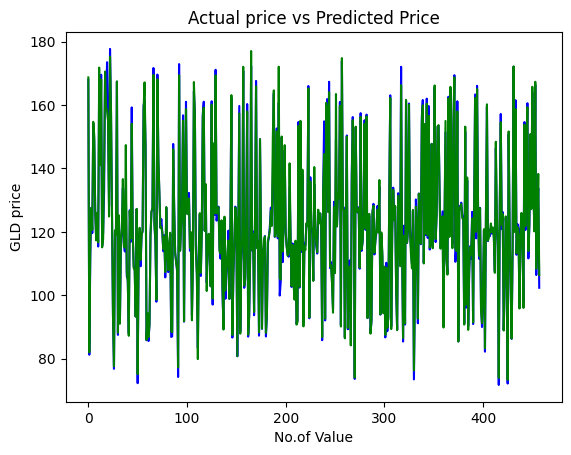

In [55]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label="Predicted Value")
plt.title("Actual price vs Predicted Price")
plt.xlabel("No.of Value")
plt.ylabel("GLD price")
plt.show()